In [1]:
#Data Preprocesing

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import PIL 
import PIL.Image
import tensorflow as tf
import pathlib
import tensorflow_datasets as tdfs
import cv2

In [3]:
Data_dir = "F:/plantVillageData/plantVillage/potato"
Categories = ['Potato___Early_blight',
'Potato___healthy',
'Potato___Late_blight']

In [4]:
Img_size = 256
training_data = []
def create_training_data():
    for category in Categories:
        path = os.path.join(Data_dir,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_COLOR)
                new_img = cv2.resize(img_array, (Img_size,Img_size))
                training_data.append([new_img,class_num])
            except Exception as e:
                pass
            
create_training_data()

In [5]:
import random
random.shuffle(training_data)

In [6]:
x = []
y= []
for features, label in training_data:
    x.append(features)
    y.append(label)
    
x = np.array(x).reshape(-1, Img_size, Img_size,3)

In [7]:
y = np.array(y)

In [8]:
y_test = y[0:100]
x_test = x[0:100]
y_train = y[100:]
x_train = x[100:]

In [9]:
print(y_test.shape)
print(y_train.shape)
print(x_test.shape)
print(x_train.shape)

(100,)
(2052,)
(100, 256, 256, 3)
(2052, 256, 256, 3)


In [10]:
import pickle
pickle_out = open("x_train.potato_processed","wb")
pickle.dump(x_train,pickle_out)
pickle_out.close()

pickle_out = open("y_train.potato_processed","wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

pickle_out = open("x_test.potato_processed","wb")
pickle.dump(x_test,pickle_out)
pickle_out.close()

pickle_out = open("y_test.potato_processed","wb")
pickle.dump(y_test, pickle_out)
pickle_out.close()

In [11]:
#classifier

In [12]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation ,Dropout, Flatten, Conv2D, MaxPooling2D
import pickle
from tensorflow import keras
import numpy as np
from tensorflow.keras import optimizers
from keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [13]:
x = pickle.load(open("x_train.potato_processed","rb"))
y = pickle.load(open("y_train.potato_processed","rb"))
x= x.astype('float32')
x = x/255.0
y = tf.keras.utils.to_categorical(y, 3)

In [14]:
x.shape

(2052, 256, 256, 3)

In [15]:
y.shape

(2052, 3)

In [16]:
#CNN model

In [17]:
model = Sequential()
model.add(Conv2D(32,kernel_size =(3,3),activation = 'relu', padding= 'same', input_shape = x.shape[1:]))
model.add(Conv2D(32,kernel_size =(3,3),activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3),activation = 'relu', padding= 'same'))
model.add(Conv2D(64, (3,3),activation = 'relu', padding= 'same'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.40))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3,activation ='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 256, 256, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0

In [18]:
model.compile(optimizer ='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [19]:
epochs = 9
batch_size = 8

In [20]:
model.fit(x, y, batch_size = batch_size, epochs = epochs, validation_split = 0.1)

Epoch 1/9
231/231 [==============================] - 54s 208ms/step - loss: 1.1263 - accuracy: 0.5353 - val_loss: 0.5126 - val_accuracy: 0.7039
Epoch 2/9
231/231 [==============================] - 81s 352ms/step - loss: 0.4421 - accuracy: 0.8424 - val_loss: 0.4120 - val_accuracy: 0.8398
Epoch 3/9
231/231 [==============================] - 118s 512ms/step - loss: 0.2950 - accuracy: 0.8913 - val_loss: 0.1214 - val_accuracy: 0.9466
Epoch 4/9
231/231 [==============================] - 127s 550ms/step - loss: 0.2094 - accuracy: 0.9221 - val_loss: 0.1283 - val_accuracy: 0.9563
Epoch 5/9
231/231 [==============================] - 151s 655ms/step - loss: 0.1843 - accuracy: 0.9336 - val_loss: 0.1452 - val_accuracy: 0.9563
Epoch 6/9
231/231 [==============================] - 154s 665ms/step - loss: 0.1280 - accuracy: 0.9650 - val_loss: 0.1026 - val_accuracy: 0.9563
Epoch 7/9
231/231 [==============================] - 172s 746ms/step - loss: 0.1485 - accuracy: 0.9510 - val_loss: 0.2811 - val_accu

In [21]:
model.save("potato_casifier.h5py")

INFO:tensorflow:Assets written to: potato_casifier.h5py\assets


In [22]:
#Model Evaluation

In [23]:
from keras.models import load_model

In [24]:
model = load_model('potato_casifier.h5py')

In [25]:
x_t = pickle.load(open("x_test.potato_processed","rb"))
y_t = pickle.load(open("y_test.potato_processed","rb"))
x_t= x_t.astype('float32')
x_t = x_t/255.0

In [26]:
pred = model.predict(x_test)

In [27]:
pred.shape

(100, 3)

In [28]:
y_t = tf.keras.utils.to_categorical(y_t, 3)

In [29]:
y_t.shape


(100, 3)

In [30]:
x_t.shape

(100, 256, 256, 3)

In [31]:
result_on_training = model.evaluate(x, y, batch_size=32)
print("train loss, train acc:", result_on_training)
print("Generate predictions for 10 samples")
predictions = model.predict(x[:10])
print("predictions shape:", predictions.shape)

65/65 [==============================] - 48s 743ms/step - loss: 0.0759 - accuracy: 0.9781
train loss, train acc: [0.0759003534913063, 0.9780701994895935]
Generate predictions for 10 samples
predictions shape: (10, 3)


In [32]:
result_on_test = model.evaluate(x_t, y_t, batch_size=32)
print("train loss, train acc:", result_on_test)
print("Generate predictions for 10 samples")
predictions_test = model.predict(x_t[:10])
print("predictions shape:", predictions_test.shape)

4/4 [==============================] - 3s 623ms/step - loss: 0.2388 - accuracy: 0.9600
train loss, train acc: [0.23884139955043793, 0.9599999785423279]
Generate predictions for 10 samples
predictions shape: (10, 3)


In [33]:
#Prediction using above model

In [34]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import pickle
import numpy as np
from keras.models import load_model

In [35]:
model = load_model('potato_casifier.h5py')

In [36]:
Img_size = 256
clas = ['early_blight','healthy','late_blight']

In [37]:
def potato_classification(pth):
    if type(pth) == str:
        test = []
        img_array = cv2.imread(pth, cv2.IMREAD_COLOR)
        new_img = cv2.resize(img_array, (Img_size,Img_size))
        test.append(new_img)
        test = np.array(test).reshape(-1, Img_size, Img_size,3)
        pred=model.predict(test)
        plt.imshow(new_img)
        print(clas[np.argmax(pred[0])])

late_blight


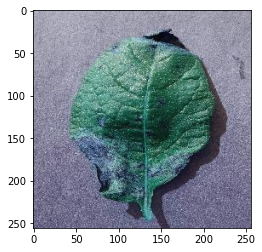

In [38]:
potato_classification('F:\\plantVillageData\\PlantVillage\\potato\\Potato___Late_blight\\00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.JPG')

healthy


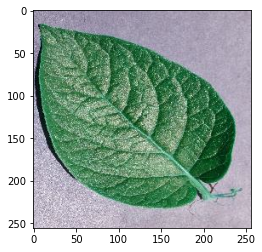

In [39]:
potato_classification('F:\\plantVillageData\\PlantVillage\\potato\\Potato___Healthy\\3a1dbeee-089c-43f0-8f51-a92d3687a515___RS_HL 1754.JPG')

In [40]:
#severity, stage and yeild predicion

In [41]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
import pickle

In [42]:
def cal_per(pth):
    if type(pth)== str:
        img_array = cv2.imread(pth, cv2.IMREAD_COLOR)
        new_img = cv2.resize(img_array, (Img_size,Img_size))
        gray = rgb2gray(new_img)
    else: 
        gray = rgb2gray(pth)
    gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
    for i in range(gray_r.shape[0]):
        if gray_r[i] > gray_r.mean():
            gray_r[i] = 255
        elif gray_r[i] > 0.5:
            gray_r[i] = 255
        elif gray_r[i] > 0.25:
            gray_r[i] = 0
        else:
            gray_r[i] = 0
    gray = gray_r.reshape(gray.shape[0],gray.shape[1])
    plt.imshow(gray, cmap='gray')
    x1 = 0
    gr = gray.reshape(-1)
    for i in range(gray.shape[0]*gray.shape[1]):
        if gr[i] != 0:
            x1+= 1
    y1=gray.shape[0]*gray.shape[1]  
    z = (y1-x1)/y1
    print("percent of infected part is ", z*100, "%")
    if z <0.3:
        print("Severity stage is 1 and yeild is" , 95 - z*100, "%")
    elif z<0.6 and z >= 0.3:
        print("Severity stage is 2 and yeild is" , 95 - z*100, "%")
    else:
        print("Severity stage is 3 and yeild is" , 95 - z*100, "%")
       

percent of infected part is  28.52325439453125 %
Severity stage is 1 and yeild is 66.47674560546875 %


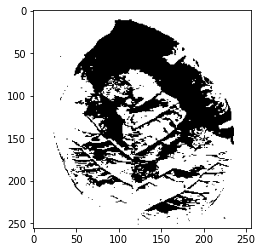

In [43]:
cal_per('C:\\Users\\Ak190\\OneDrive\\Desktop\\p.jpg')

percent of infected part is  51.7730712890625 %
Severity stage is 2 and yeild is 43.2269287109375 %


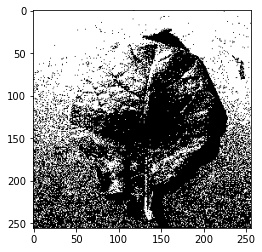

In [44]:
cal_per('F:\\plantVillageData\\PlantVillage\\potato\\Potato___Late_blight\\00b1f292-23dd-44d4-aad3-c1ffb6a6ad5a___RS_LB 4479.JPG')

percent of infected part is  59.07135009765625 %
Severity stage is 2 and yeild is 35.92864990234375 %


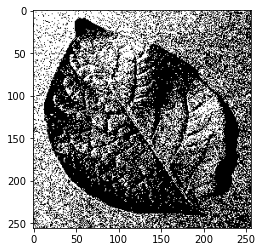

In [45]:
cal_per(x[2004])